## Image preprocessing
This Notebook illustrates and executes an example of image preprocessing for GAN compression of faces.
At present, they are flattened to grayscale and downsampled to 32x32 pixels.

In [2]:
import sys
from tqdm import *
sys.path.insert(0, '/Users/mlomnitz/Documents/Insight/CompressionGAN/ops/')
from ops import *

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


The following illustrates an example of the preprocessing step on one of the original images. 

(500, 500, 3)


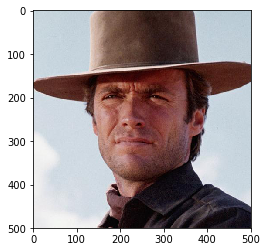

In [28]:

dir_name = '/Users/mlomnitz/Documents/Insight/faces_datasets/imdb_crop/42/nm0000142_rm188318976_1930-5-31_1968.jpg'
test_im = Image.open(dir_name)
arr = np.asarray(test_im)
print(arr.shape)
plt.imshow(test_im)
tmp = fit_to_canvas(test_im, 512,512)
tmp.show()
#tmp.save('testing.jpg')

## Training images
We will load and preprocess the relevant files for the problem. Load all files that are larger than 30 kb ("high def") , preprocess and save to a secondary location to be used in the training. The IMDB data set will provide ~44k images satisfying the previous condition. If necesary we can later augment the data by mirroring along y-axis.

In [11]:
import subprocess
data_dir = '/Users/mlomnitz/Documents/Insight/faces_datasets/imdb_crop'
inString = subprocess.Popen('find '+data_dir+' -type f -size +30k', shell=True, stdout=subprocess.PIPE).communicate()[0].decode('utf-8').strip()
file_list = inString.splitlines()
tot_range = len(file_list)
print(tot_range, file_list[0])


(44270, u'/Users/mlomnitz/Documents/Insight/faces_datasets/imdb_crop/61/nm0252961_rm227335424_1972-9-6_2013.jpg')


In [47]:
new_list = []
rejects = []
for ii in tqdm(range(tot_range)):
    try:
        im=Image.open(file_list[ii])
    except IOError:
        continue
    side =[float(x) for x in im.size]
#     if side[0] < 450 or side[1] < 450:
#         continue
    if side[0] > 450 and side[1] > 450 and side[0]/side[1] < 1.1 and side[0]/side[1] > 0.9:
        new_list.append(file_list[ii])
    else:
        rejects.append(file_list[ii])
        #print(ii)

100%|██████████| 44270/44270 [00:03<00:00, 11718.73it/s]


In [48]:
#print(new_list)
print(len(file_list), 'Good list: ', len(new_list), 'Rejects: ', len(rejects))
dir_location = '/Users/mlomnitz/Documents/Insight/faces_datasets/imdb_quality_faces/'
mkdir(dir_location)

(44270, 'Good list: ', 40735, 'Rejects: ', 3534)


## Processing the lists
We now use the previously defined lists to process all of the images we have flagged as good to be used later for the model.

In [49]:
def make_fit_images(thelist, location = '/Users/mlomnitz/Documents/Insight/faces_datasets/imdb_quality_faces/'):
    tot_range = len(thelist)
    for ii in tqdm(range(tot_range)):
        try:
            im=Image.open(thelist[ii])
        except IOError:
            print("Failed on", str(ii), thelist[ii])
            continue
        new_name = location+thelist[ii].rsplit('/',1)[-1]
        tmp = fit_to_canvas(im, 512,512)
        tmp.save(new_name)


In [51]:
rejects_loc = '/Users/mlomnitz/Documents/Insight/faces_datasets/good_sample/'
make_fit_images(new_list,dir_location)

100%|██████████| 3534/3534 [01:18<00:00, 44.86it/s]


## Make file lists
Finally we create lists of the training, test and validation lists from the contents of the directory with the preprocessed images and output them to the data directory with the default name for the potraits model.

In [ ]:
ds_loc = '/home/mlomnitz/imdb_quality_faces_v3'
out_path = '/home/mlomnitz/CompressionGAN_GCC/data/'
mylist = readDirToList(ds_loc)
saveToDataFrame(out_path,'faces_paths', mylist[:10])
